In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
database_path = "./data/R&D_automotive.xls"

In [3]:
data = pd.read_excel(database_path)

In [4]:
df_cleaned = data.dropna()

In [5]:
df_cleaned = df_cleaned.drop(columns=['Employees'])

In [6]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [7]:
df_cleaned

,Company,Year,Country,R&D (€million),R&D one-year growth (%),Net sales (€million),Net sales one-year growth (%),R&D intensity (%),Capex (€million),Capex one-year growth (%),Capex intensity (%),Op.profits (€million),Profitability (%)
0,VOLKSWAGEN,2011,Germany,7203.000,15.100671,159337.000,25.585813,4.520607,8087.000,22.095621,5.075406,10930.000,6.85967
1,VOLKSWAGEN,2012,Germany,9515.000,32.100000,193000.000,21.400000,4.900000,10493.000,-4.800000,5.400000,8333.000,4.3
2,VOLKSWAGEN,2013,Germany,11743.000,23.415659,197007.000,2.247815,5.960702,11385.000,-8.176302,5.778982,11500.000,5.83736
3,VOLKSWAGEN,2014,Germany,13120.000,11.726135,202458.000,2.766907,6.480356,12012.000,5.556522,5.933082,12139.000,5.99581
4,VOLKSWAGEN,2015,Germany,13612.000,3.750000,213292.000,5.351233,6.381861,13213.000,-110.116155,6.194794,-1228.000,-0.575737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,GESTAMP,2017,Spain,72.700,23.500000,8201.600,8.600000,0.900000,787.400,34.100000,9.600000,479.900,5.9
309,GESTAMP,2018,Spain,85.790,17.932504,8547.638,4.219521,1.003669,793.976,0.829903,9.288835,524.290,6.13374
310,GESTAMP,2019,Spain,74.280,-13.416482,9065.146,6.054398,0.819402,718.473,-9.509481,7.925664,505.646,5.57791
311,GESTAMP,2020,Spain,58.849,-20.774100,7455.840,-17.752700,0.789300,483.133,-32.755600,6.479900,58.257,0.7814


In [8]:
features = data[['Company', 'Op.profits (€million)', 'Net sales (€million)', 'R&D  (€million)', 'Capex (€million)']]

In [9]:
company_means = features.groupby('Company').mean().reset_index()

In [10]:
filtered_data = company_means[company_means['R&D  (€million)'] > 1000]

In [11]:
clustering_data = filtered_data[['Op.profits (€million)', 'Net sales (€million)']]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [13]:
from sklearn.cluster import KMeans

# Determine the number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster labels to the original data
filtered_data['Cluster'] = clusters

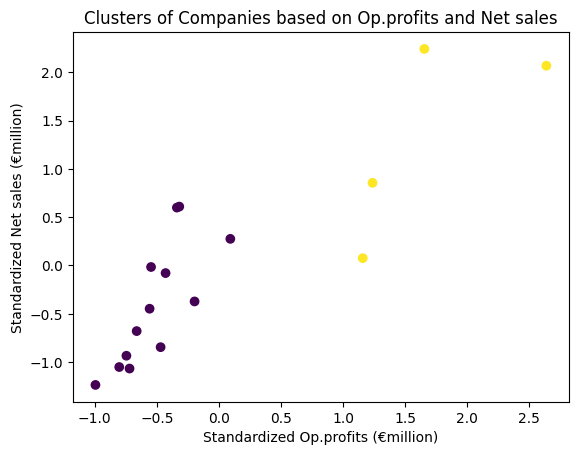

In [14]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Standardized Op.profits (€million)')
plt.ylabel('Standardized Net sales (€million)')
plt.title('Clusters of Companies based on Op.profits and Net sales')
plt.show()

## Low profit/sales companies

In [15]:
cluster_number1 = 0

In [16]:
filtered_data[filtered_data['Cluster'] == cluster_number1]['Company'].unique()

array(['AISIN SEIKI', 'CONTINENTAL', 'FORD MOTOR', 'GENERAL MOTORS',
       'HONDA MOTOR', 'HYUNDAY MOTOR', 'NISSAN MOTOR', 'PEUGEOT',
       'RENAULT', 'SAIC MOTOR', 'SUZUKI MOTOR', 'TATA MOTORS', 'TESLA'],
      dtype=object)

In [17]:
filtered_data[filtered_data['Cluster'] == cluster_number1]

,Company,Op.profits (€million),Net sales (€million),R&D (€million),Capex (€million),Cluster
0,AISIN SEIKI,1296.010568,26150.730714,1329.267906,1887.846923,0
3,CONTINENTAL,2725.218182,38151.981818,2675.509091,2296.000000,0
7,FORD MOTOR,3286.819778,122492.640602,5871.236640,5572.580058,0
8,GENERAL MOTORS,3369.852468,123090.386041,6248.359478,16456.754489,0
12,HONDA MOTOR,5132.567033,103601.459796,5570.467974,3821.074470,0
13,HYUNDAY MOTOR,3897.549497,65784.013524,1716.178279,3804.530161,0
18,NISSAN MOTOR,2896.315352,82918.462226,3943.885859,6438.049057,0
19,PEUGEOT,2345.000000,61388.125000,2873.625000,1914.750000,0
21,RENAULT,1898.090909,47873.363636,2496.545455,2253.400000,0
22,SAIC MOTOR,2394.634903,86596.086053,1404.509324,2498.724129,0


In [18]:
selected_data = filtered_data[filtered_data['Cluster'] == cluster_number1].copy()

In [19]:
features = selected_data[['Company', 'Op.profits (€million)']]


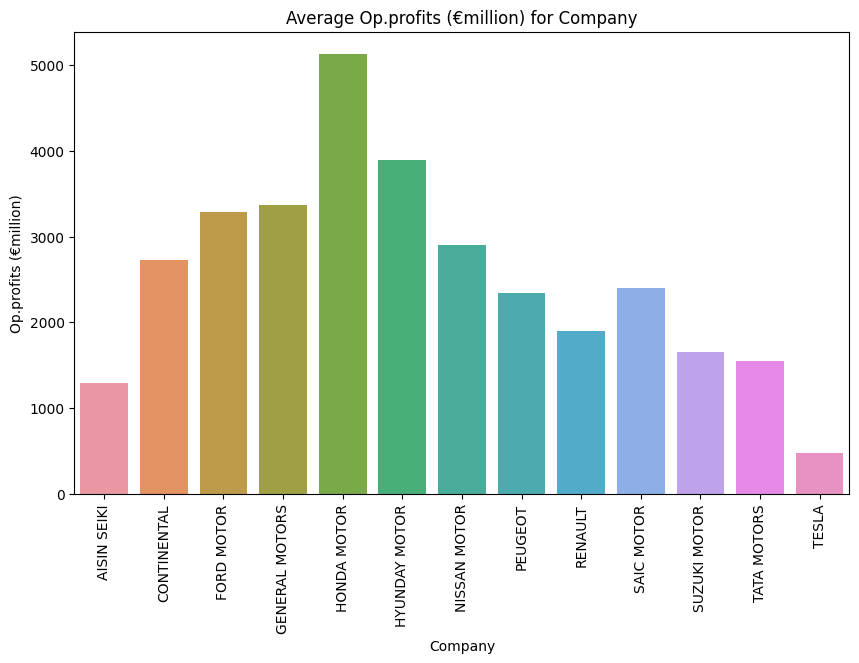

In [20]:
features = selected_data[['Company', 'Op.profits (€million)']]

# Trend analysis for R&D spending over years
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='Company', y='Op.profits (€million)')
plt.title('Average Op.profits (€million) for Company')
plt.xticks(rotation=90)

plt.show()

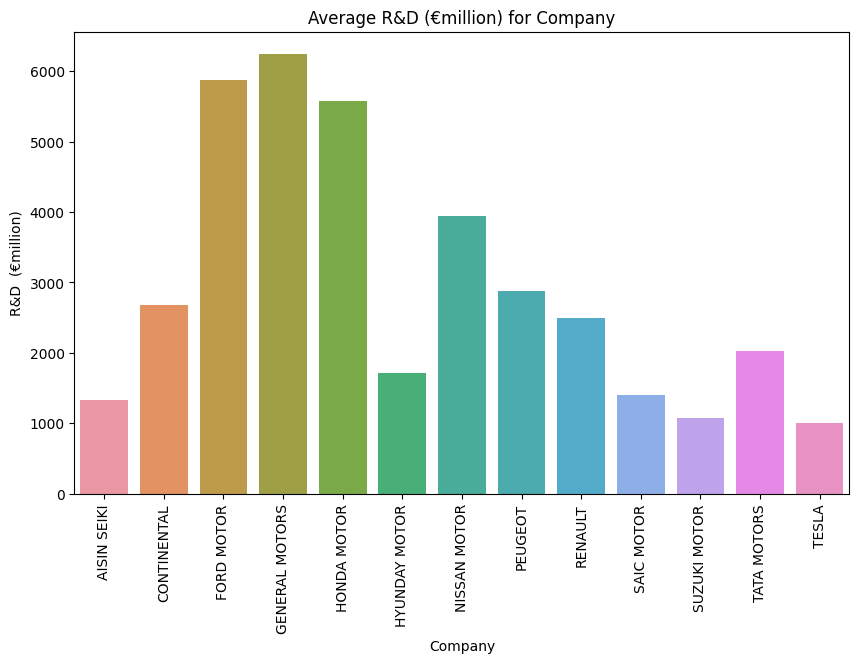

In [21]:
features = selected_data[['Company', 'R&D  (€million)']]

# Trend analysis for R&D spending over years
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='Company', y='R&D  (€million)')
plt.title('Average R&D (€million) for Company')
plt.xticks(rotation=90)

plt.show()

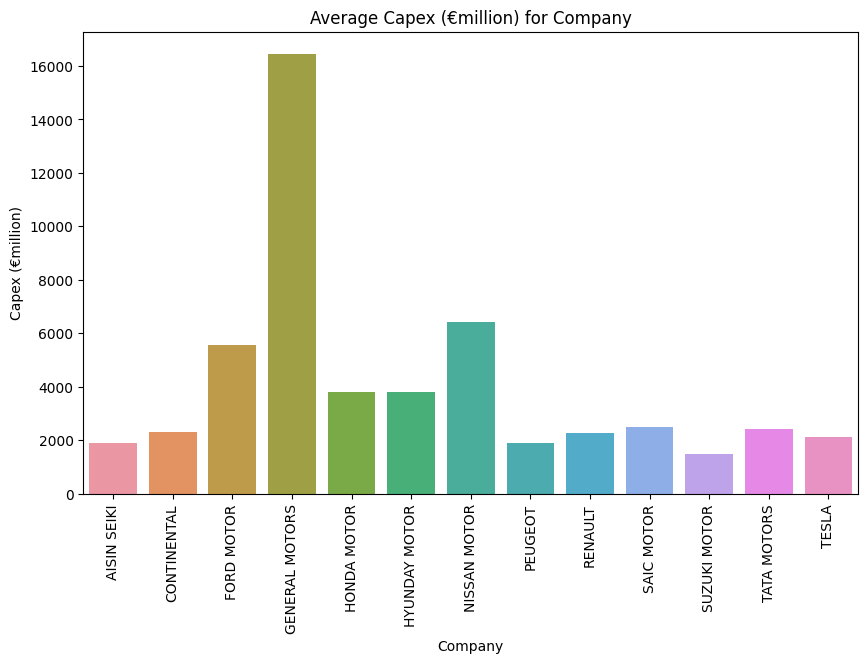

In [22]:
features = selected_data[['Company', 'Capex (€million)']]

# Trend analysis for R&D spending over years
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='Company', y='Capex (€million)')
plt.title('Average Capex (€million) for Company')
plt.xticks(rotation=90)

plt.show()

## High profit/sales companies

In [23]:
cluster_number2 = 1

In [24]:
filtered_data[filtered_data['Cluster'] == cluster_number2]['Company'].unique()

array(['BMW', 'DAIMLER', 'TOYOTA MOTOR', 'VOLKSWAGEN'], dtype=object)

In [25]:
filtered_data[filtered_data['Cluster'] == cluster_number2]

,Company,Op.profits (€million),Net sales (€million),R&D (€million),Capex (€million),Cluster
1,BMW,9706.000000,91937.454545,5470.272727,6220.363636,1
5,DAIMLER,10042.800000,137454.900000,6997.500000,5739.500000,1
27,TOYOTA MOTOR,16045.484485,208207.497256,7679.657110,22498.781513,1
28,VOLKSWAGEN,11832.454545,218356.727273,12828.363636,11878.454545,1


In [26]:
selected_data = filtered_data[filtered_data['Cluster'] == cluster_number2].copy()

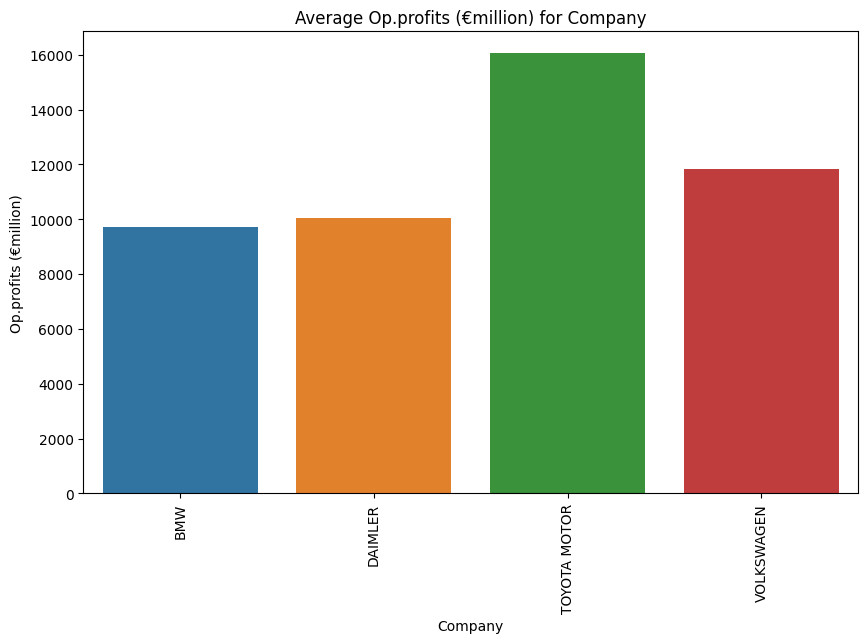

In [27]:
features = selected_data[['Company', 'Op.profits (€million)']]

# Trend analysis for R&D spending over years
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='Company', y='Op.profits (€million)')
plt.title('Average Op.profits (€million) for Company')
plt.xticks(rotation=90)

plt.show()

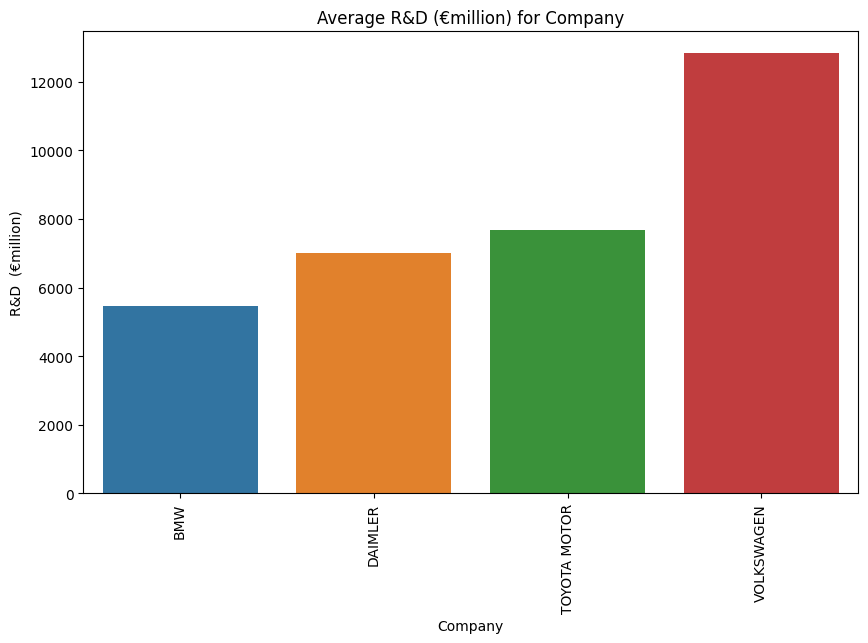

In [28]:
features = selected_data[['Company', 'R&D  (€million)']]

# Trend analysis for R&D spending over years
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='Company', y='R&D  (€million)')
plt.title('Average R&D (€million) for Company')
plt.xticks(rotation=90)

plt.show()

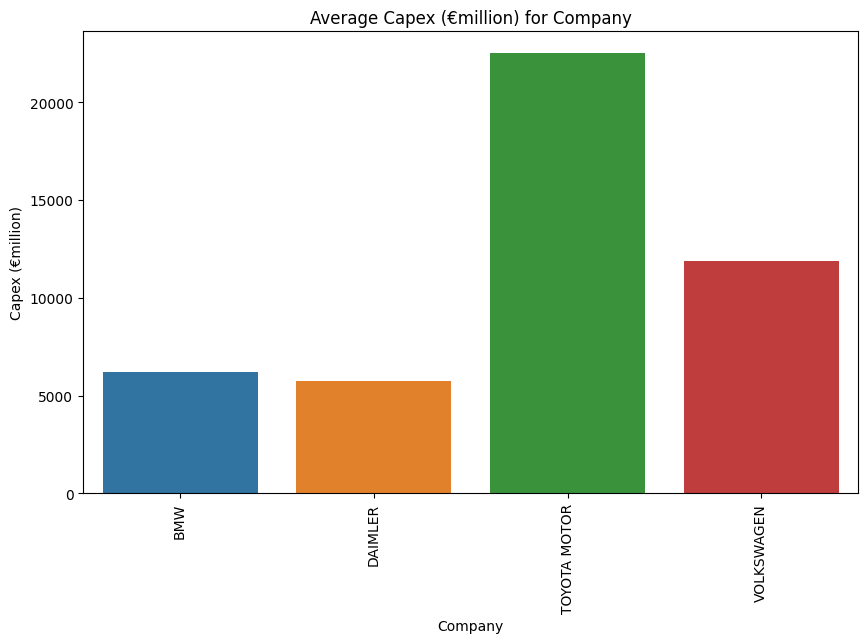

In [29]:
features = selected_data[['Company', 'Capex (€million)']]

# Trend analysis for R&D spending over years
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data, x='Company', y='Capex (€million)')
plt.title('Average Capex (€million) for Company')
plt.xticks(rotation=90)

plt.show()

## Maximize the operating profits - low profit/sales companies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
cluster_number1 = 0

In [32]:
filtered_data[filtered_data['Cluster'] == cluster_number1]['Company'].unique()

array(['AISIN SEIKI', 'CONTINENTAL', 'FORD MOTOR', 'GENERAL MOTORS',
       'HONDA MOTOR', 'HYUNDAY MOTOR', 'NISSAN MOTOR', 'PEUGEOT',
       'RENAULT', 'SAIC MOTOR', 'SUZUKI MOTOR', 'TATA MOTORS', 'TESLA'],
      dtype=object)

In [33]:
selected_data = filtered_data[filtered_data['Cluster'] == cluster_number1].copy()

In [34]:
data_to_maximize_profit = selected_data[['R&D  (€million)', 'Capex (€million)', 'Op.profits (€million)']]

In [35]:
X = data_to_maximize_profit[['R&D  (€million)', 'Capex (€million)']]
y = data_to_maximize_profit['Op.profits (€million)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
num_particles=10
num_iterations=20

In [37]:
from AutomaticAI import ParticleSwarmOptimization as pso_algorithm

In [38]:
pso = pso_algorithm.PSO(particle_count=num_particles, distance_between_initial_particles=0.7, is_classification=False, evaluation_metric=r2_score)

In [39]:
best_metric, best_model = pso.fit(X_train=X_train,
                                  X_test=X_test,
                                  Y_train=y_train,
                                  Y_test=y_test,
                                  maxiter=num_iterations,
                                  verbose=True,
                                  max_distance=0.05)

--- START EPOCH 0 ---
* Parameter=min_impurity_decrease Value=2.096628425474938 *
* Parameter=min_samples_split Value=67 *
* Parameter=min_samples_leaf Value=30 *
* Parameter=splitter Value=best *
* Parameter=criterion Value=friedman_mse *
* Particle 0 Algorithm Type DECISION TREE REGRESSOR: personal best metric=-1 *
* Parameter=min_impurity_decrease Value=6.141964816986722 *
* Parameter=min_samples_split Value=142 *
* Parameter=min_samples_leaf Value=77 *
* Parameter=splitter Value=best *
* Parameter=criterion Value=friedman_mse *
* Particle 1 Algorithm Type DECISION TREE REGRESSOR: personal best metric=-1 *
* Parameter=min_impurity_decrease Value=17.109844874885148 *
* Parameter=min_samples_split Value=126 *
* Parameter=min_samples_leaf Value=80 *
* Parameter=splitter Value=best *
* Parameter=criterion Value=mse *
* Particle 2 Algorithm Type DECISION TREE REGRESSOR: personal best metric=-1 *
* Parameter=min_impurity_decrease Value=18.46867308195667 *
* Parameter=min_samples_split Val

IndexError: range object index out of range